In [80]:
# imports
import warnings # ignore warnings, for clarity
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
import numpy as np
import csv
from matplotlib.ticker import FuncFormatter

# this allows plots to appear directly in the notebook
%matplotlib inline

In [108]:
data = pd.read_csv('education_data_set.csv', thousands=',') #use the 'thousands' arg to clean up commas
data.rename(columns={'class':'clsize'}, inplace=True) #Had to rename the column 'class'
data_000 = data/1000.0
data_000.rename(columns=lambda x: x+ '_000', inplace=True)
data = data.join(data_000,how='outer')
data_used  = data[['passall','teachexp','attend','teturn','pecd','pafr','phisp']]
summary_table = data_used.describe()
data['pecd_squared'] = data['pecd']**2


In [3]:
data.columns

Index([u'distid', u'totskol', u'totstud', u'pafr', u'phisp', u'pecd',
       u'passall', u'econdpas', u'pteacher', u'salteach', u'clsize',
       u'teachexp', u'teturn', u'propval', u'stateaid', u'totrev', u'revpup',
       u'revpstat', u'revplocr', u'revpfed', u'attend', u'charter',
       u'distid_000', u'totskol_000', u'totstud_000', u'pafr_000',
       u'phisp_000', u'pecd_000', u'passall_000', u'econdpas_000',
       u'pteacher_000', u'salteach_000', u'clsize_000', u'teachexp_000',
       u'teturn_000', u'propval_000', u'stateaid_000', u'totrev_000',
       u'revpup_000', u'revpstat_000', u'revplocr_000', u'revpfed_000',
       u'attend_000', u'charter_000'],
      dtype='object')

(array([ 726.,  137.,   82.,   38.,   21.,   10.,    9.,    4.,    4.,    2.]),
 array([  0. ,   8.4,  16.8,  25.2,  33.6,  42. ,  50.4,  58.8,  67.2,
         75.6,  84. ]),
 <a list of 10 Patch objects>)

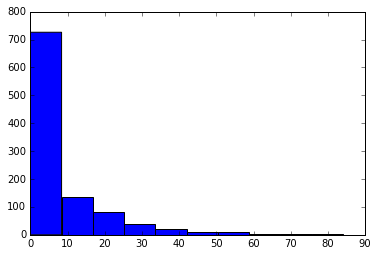

In [4]:
plt.hist(data['pafr'])

(array([ 289.,  223.,  130.,  100.,   85.,   50.,   41.,   32.,   29.,   54.]),
 array([   0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,
          90.,  100.]),
 <a list of 10 Patch objects>)

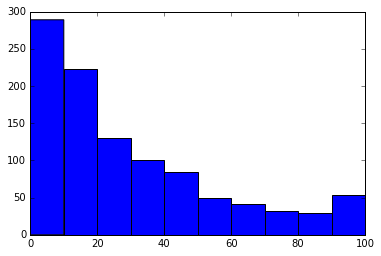

In [5]:
plt.hist(data['phisp'])

In [6]:
np.mean(data['passall']), np.mean(data['econdpas'])

(86.88228460793798, 81.78654404646663)

In [7]:
def to_percent(y, position):
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations.
    s = str(int((y*100)))
    return s
    
formatter = FuncFormatter(to_percent)

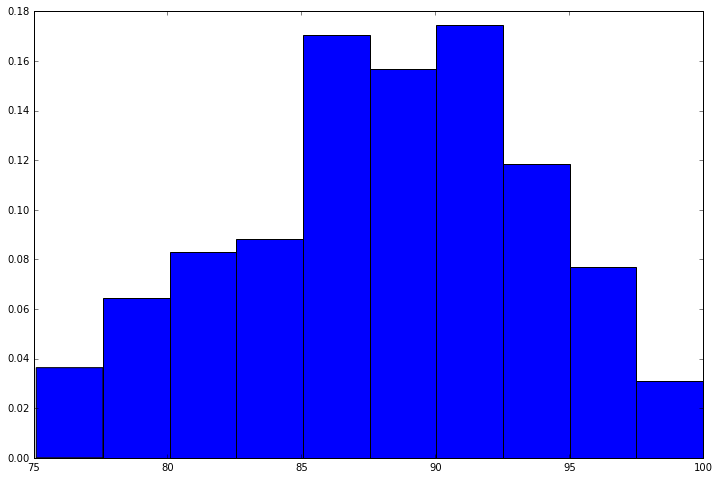

In [78]:
fig = plt.figure(figsize=(12,8))
hist = plt.hist(df_filtered['passall'], weights=np.zeros_like(df_filtered['passall']) + 1. / df_filtered['passall'].size)

### fig = plt.figure(figsize=(12,8))
hist = plt.hist(data['passall'], weights=np.zeros_like(data['passall']) + 1. / data['passall'].size)

avg = plt.plot([86.9,86.9],[0,0.30])
plt.setp(avg, color='r', linewidth=5.0)
plt.xlabel('Percent of Students that Pass State Tests', fontsize=14)
plt.ylabel('Percent of Sample School Districts', fontsize=14)
plt.gca().yaxis.set_major_formatter(formatter)
plt.savefig('/Users/tohorner/Documents/School/MRP Fall 2016/Quant/passall.png')




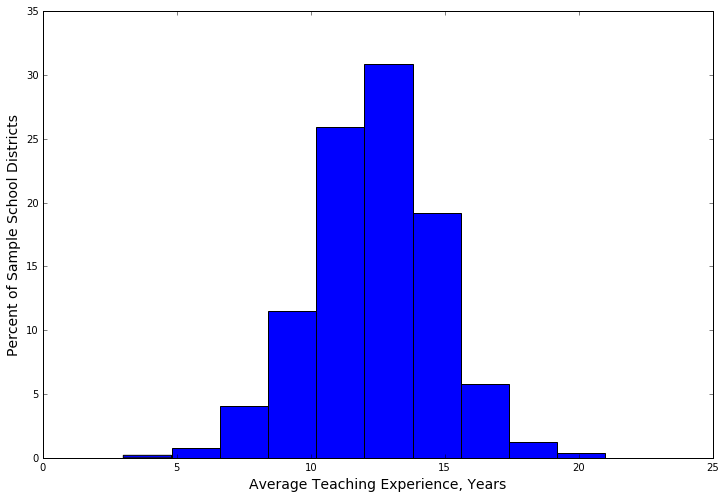

In [9]:

formatter = FuncFormatter(to_percent)
fig = plt.figure(figsize=(12,8))
plt.hist(data['teachexp'], weights=np.zeros_like(data['teachexp']) + 1. / data['teachexp'].size)
plt.xlabel('Average Teaching Experience, Years', fontsize=14)
plt.ylabel('Percent of Sample School Districts', fontsize=14)
plt.gca().yaxis.set_major_formatter(formatter)
plt.savefig('teaching_exp.png')

([array([   0.,    0.,    1.,    3.,   17.,   47.,  126.,  278.,  405.,  156.]),
  array([   1.,    0.,    5.,   12.,   47.,  117.,  272.,  314.,  189.,   76.])],
 array([  36.4 ,   42.76,   49.12,   55.48,   61.84,   68.2 ,   74.56,
          80.92,   87.28,   93.64,  100.  ]),
 <a list of 2 Lists of Patches objects>)

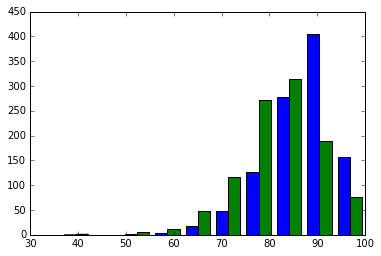

In [10]:
plt.hist([data['passall'], data['econdpas']])

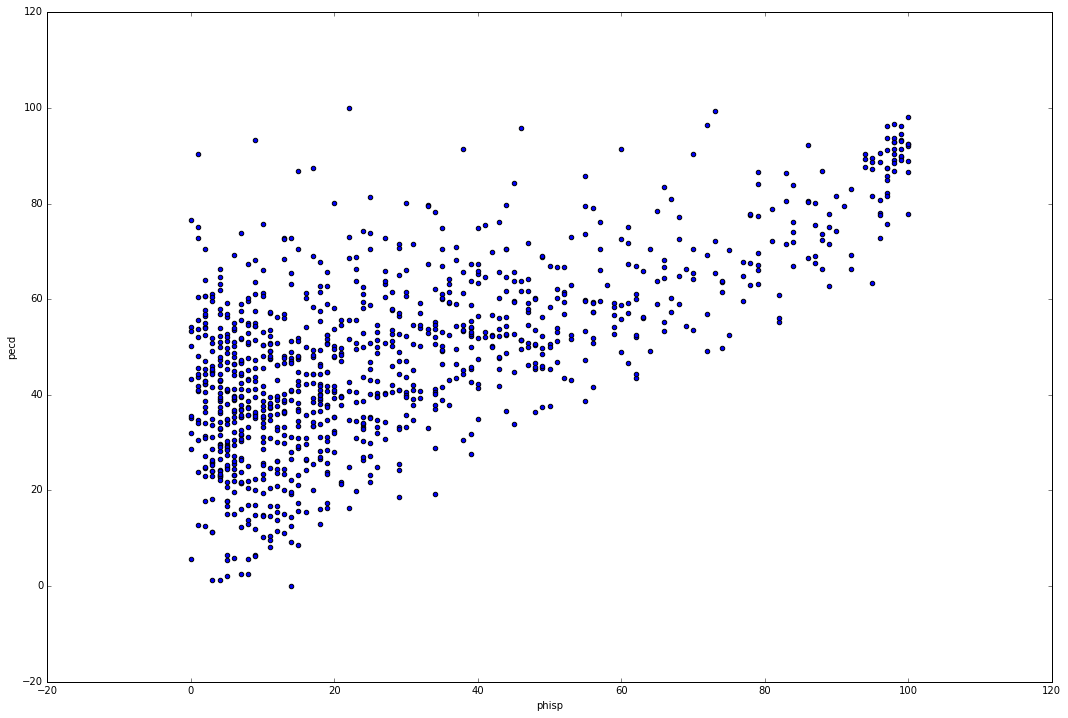

In [11]:
scatter = data.plot(kind='scatter', x='phisp', y='pecd',figsize=(18, 12))

In [12]:
lm_bi_test = sm.formula.ols(formula='econdpas ~ passall', data=data).fit()
lm_bi_test.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               econdpas   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     3729.
Date:                Thu, 22 Dec 2016   Prob (F-statistic):               0.00
Time:                        07:24:45   Log-Likelihood:                -2877.7
No. Observations:                1033   AIC:                             5759.
Df Residuals:                    1031   BIC:                             5769.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -8.5220      1.484     -5.743      0.000       -11.434    -5.610
passall        1.0394      0.017     61.062      0.000         1.006     1.073
==============================================================================
Omnibus:                      250.346   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1399.682
Skew:                          -0.991   Prob(JB):                    1.16e-304
Kurtosis:                       8.347   Cond. No.                     1.06e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

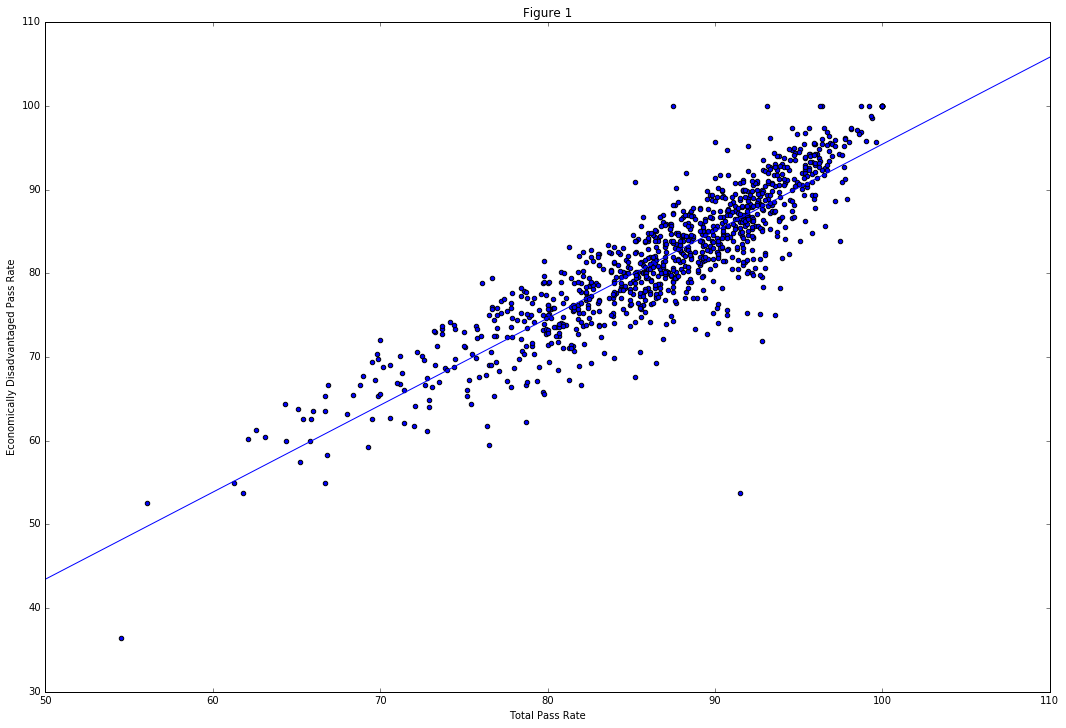

In [13]:
test_scatter = data.plot(kind='scatter', x='passall', y='econdpas',figsize=(18, 12))
sm.graphics.abline_plot(model_results=lm_bi_test,ax=test_scatter)
plt.title('Figure 1')
plt.ylabel('Economically Disadvantaged Pass Rate')
plt.xlabel('Total Pass Rate')

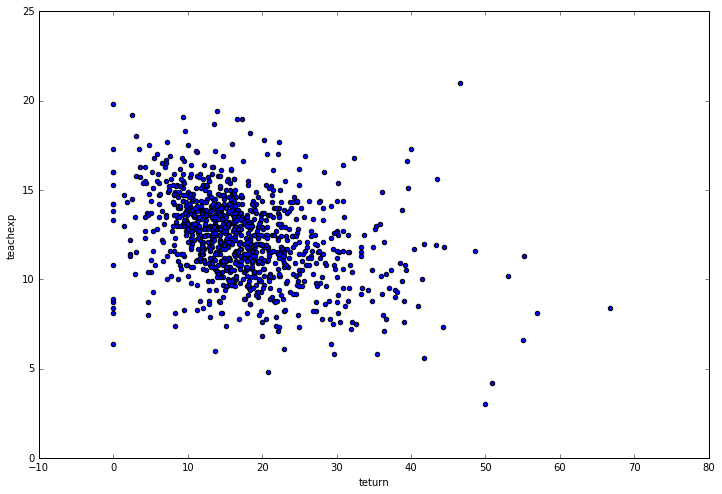

In [14]:
data.plot(kind='scatter',x = 'teturn',y = 'teachexp',figsize=(12,8))

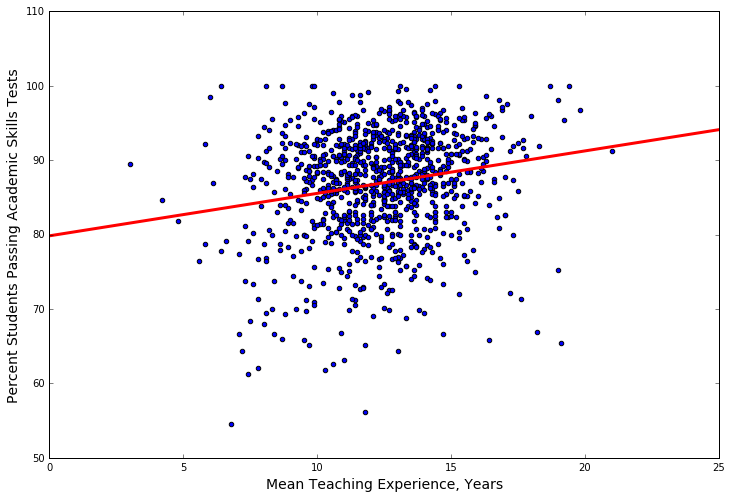

In [55]:
lm_bi = sm.formula.ols(formula='passall ~ teachexp', data=data).fit()
scatter = data.plot(kind='scatter', x='teachexp', y='passall',figsize=(12, 8))
sm.graphics.abline_plot(model_results=lm_bi,ax=scatter, color='r',linewidth='3')
plt.ylabel('Percent Students Passing Academic Skills Tests', fontsize=14)
plt.xlabel('Mean Teaching Experience, Years', fontsize=14)
plt.savefig('/Users/tohorner/Documents/School/MRP Fall 2016/Quant/teaching_bivariate.png')

In [18]:
lm_bi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                passall   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     37.15
Date:                Thu, 22 Dec 2016   Prob (F-statistic):           1.54e-09
Time:                        07:24:49   Log-Likelihood:                -3483.5
No. Observations:                1033   AIC:                             6971.
Df Residuals:                    1031   BIC:                             6981.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     79.8330      1.177     67.815      0.000        77.523    82.143
teachexp       0.5708      0.094      6.095      0.000         0.387     0.755
==============================================================================
Omnibus:                      128.445   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.622
Skew:                          -0.889   Prob(JB):                     1.81e-41
Kurtosis:                       4.094   Cond. No.                         67.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

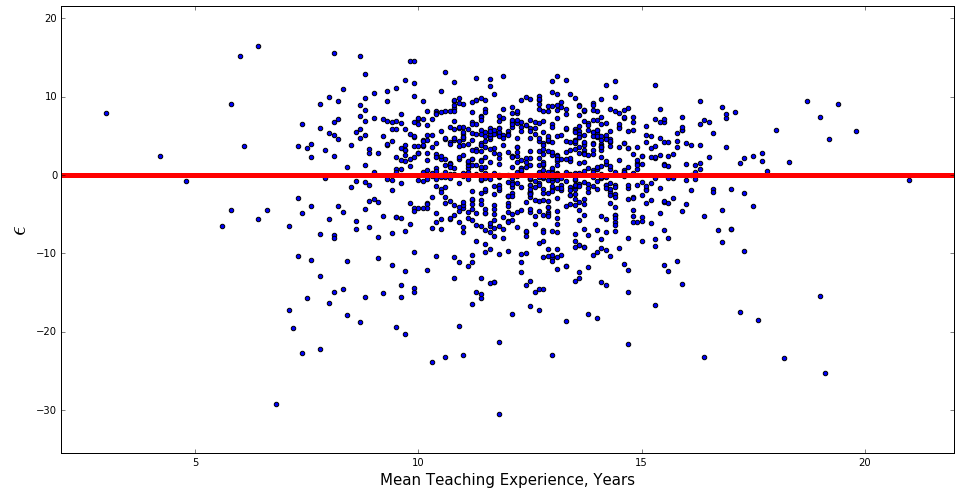

In [103]:
plt.figure(figsize=(16,8))
bi_resid = plt.scatter(data.teachexp, lm_bi.resid)
mean = np.mean(lm_bi.resid)
max = np.max(data.teachexp)
min = np.min(data.teachexp)
m = plt.plot([min-1,max+1],[mean,mean])
plt.setp(m, color='r', linewidth=5.0)
plt.axis([min-1,max+1,np.min(lm_bi.resid)-5,np.max(lm_bi.resid)+5])
plt.xlabel('Mean Teaching Experience, Years',fontsize='15')
plt.ylabel('$\epsilon$',fontsize='24')
plt.savefig('/Users/tohorner/Documents/School/MRP Fall 2016/Quant/teaching_bivariate_resid.png')






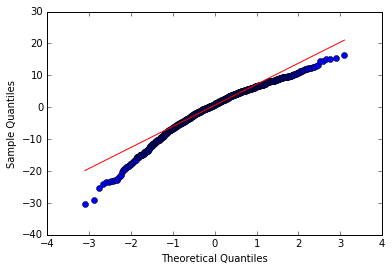

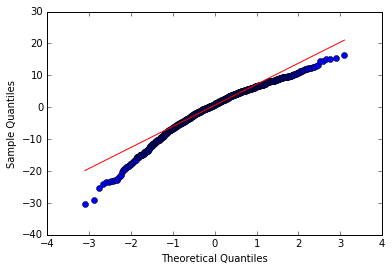

In [86]:
statsmodels.graphics.gofplots.qqplot(lm_bi.resid,line='q')

In [19]:
lm_mult = sm.formula.ols(formula='passall ~ teachexp + pecd + attend + pafr + phisp + teturn', data=data).fit()
lm_mult.summary()

    


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                passall   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     130.3
Date:                Thu, 22 Dec 2016   Prob (F-statistic):          1.50e-122
Time:                        07:24:49   Log-Likelihood:                -3209.1
No. Observations:                1033   AIC:                             6432.
Df Residuals:                    1026   BIC:                             6467.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -73.1757     19.455     -3.761      0.000      -111.351   -35.000
teachexp       0.3395      0.078      4.370      0.000         0.187     0.492
pecd          -0.1456      0.013    -11.015      0.000        -0.171    -0.120
attend         1.7314      0.201      8.598      0.000         1.336     2.127
pafr          -0.0989      0.016     -6.201      0.000        -0.130    -0.068
phisp         -0.0225      0.010     -2.332      0.020        -0.041    -0.004
teturn        -0.1186      0.022     -5.477      0.000        -0.161    -0.076
==============================================================================
Omnibus:                       92.438   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.399
Skew:                          -0.551   Prob(JB):                     1.01e-42
Kurtosis:                       4.810   Cond. No.                     1.32e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [114]:
lm_mult2 = sm.formula.ols(formula='passall ~ teachexp + pecd + attend', data=data).fit()
lm_mult2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                passall   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     218.6
Date:                Thu, 22 Dec 2016   Prob (F-statistic):          1.11e-109
Time:                        16:50:52   Log-Likelihood:                -3247.1
No. Observations:                1033   AIC:                             6502.
Df Residuals:                    1029   BIC:                             6522.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   -102.5613     19.770     -5.188      0.000      -141.356   -63.767
teachexp       0.4708      0.075      6.296      0.000         0.324     0.618
pecd          -0.1799      0.009    -19.236      0.000        -0.198    -0.162
attend         2.0009      0.205      9.768      0.000         1.599     2.403
==============================================================================
Omnibus:                       77.691   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.846
Skew:                          -0.533   Prob(JB):                     8.62e-30
Kurtosis:                       4.405   Cond. No.                     1.23e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
lm_mult.cov_params()

,Intercept,teachexp,pecd,attend,pafr,phisp,teturn
Intercept,378.480222,0.003423,-0.019225,-3.910146,-0.051014,-0.024090,-0.030451
teachexp,0.003423,0.006035,-0.000017,-0.000906,-0.000105,0.000006,0.000616
pecd,-0.019225,-0.000017,0.000175,0.000155,-0.000082,-0.000092,-0.000033
attend,-3.910146,-0.000906,0.000155,0.040555,0.000550,0.000259,0.000168
pafr,-0.051014,-0.000105,-0.000082,0.000550,0.000254,0.000068,-0.000037
phisp,-0.024090,0.000006,-0.000092,0.000259,0.000068,0.000093,0.000017
teturn,-0.030451,0.000616,-0.000033,0.000168,-0.000037,0.000017,0.000469


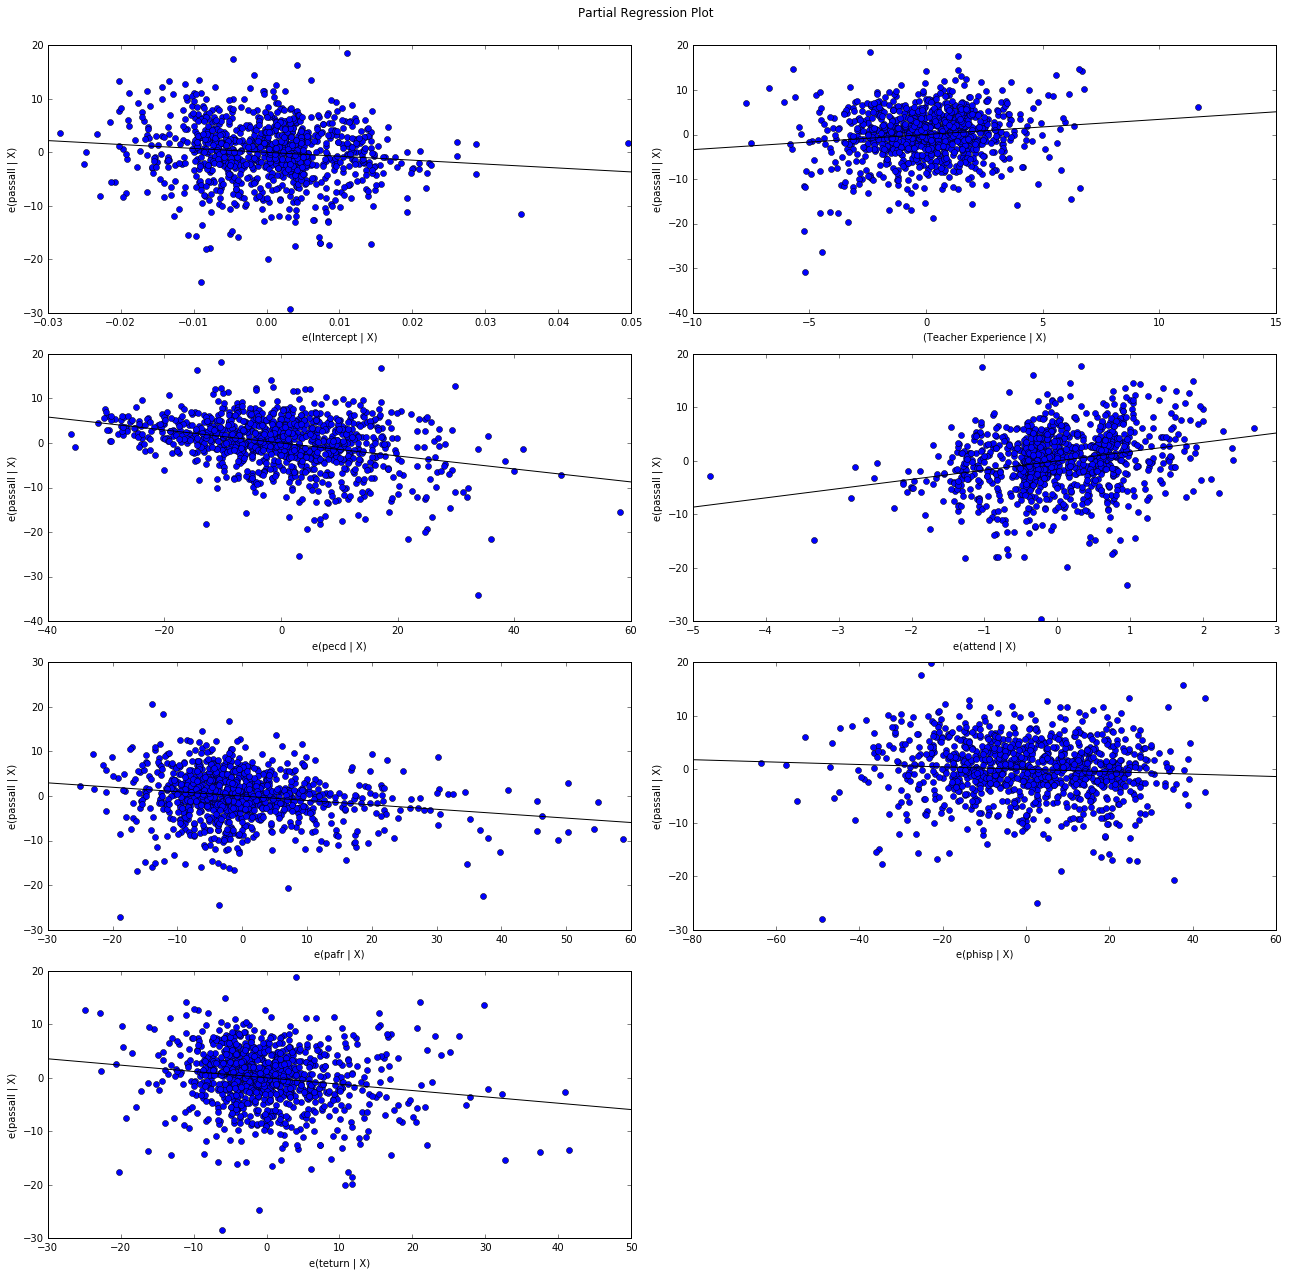

In [22]:
fig = plt.figure(figsize=(18,18))
fig = sm.graphics.plot_partregress_grid(lm_mult2, fig=fig)
fig.axes[1].set_xlabel('(Teacher Experience | X)')

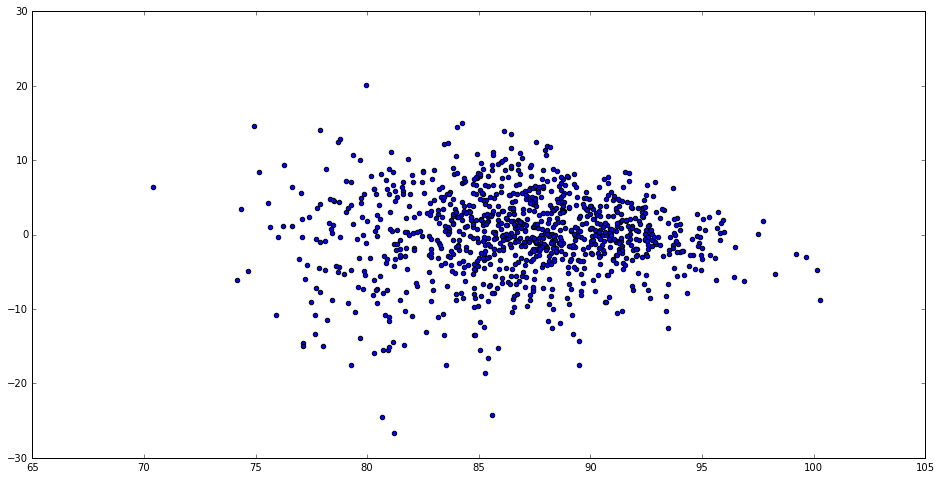

In [115]:
plt.figure(figsize=(16,8))
mult_resid = plt.scatter(lm_mult2.fittedvalues, lm_mult2.resid)
mean = np.mean(lm_mult2.resid)
max = np.max(dlm_mult2.fittedvalues)
min = np.min(lm_mult2.fittedvalues)
m = plt.plot([min-1,max+1],[mean,mean])
plt.setp(m, color='r', linewidth=5.0)
plt.axis([min-1,max+1,np.min(lm_bi.resid)-5,np.max(lm_bi.resid)+5])
plt.xlabel('Mean Teaching Experience, Years',fontsize='15')
plt.ylabel('$\epsilon$',fontsize='24')
plt.savefig('/Users/tohorner/Documents/School/MRP Fall 2016/Quant/teaching_bivariate_resid.png')




Since we are doing multivariate regressions, we cannot just look at individual bivariate plots to discern relationships. Instead, we want to look at the relationship of the dependent variable and independent variables conditional on the other independent variables. We can do this through using partial regression plots, otherwise known as added variable plots. In a partial regression plot, to discern the relationship between the response variable and the $k-th$ variabe, we compute 
the residuals by regressing the response variable versus the independent variables excluding $X_k$. We can denote this by 
$X_{\sim k}$. We then compute the residuals by regressing $X_k$ on $X_{\sim k}$. The partial regression plot is the plot 
of the former versus the latter residuals. 
The notable points of this plot are that the fitted line has slope $\beta_k$ and intercept zero. The residuals of this plot 
are the same as those of the least squares fit of the original model with full $X$. You can discern the effects of the 
individual data values on the estimation of a coefficient easily. If obs_labels is True, then these points are annotated 
with their observation label. You can also see the violation of underlying assumptions such as homooskedasticity and 
linearity.

In [25]:
np.var(lm_bi.resid),np.var(lm_mult.resid)

(49.723069267835456, 29.234130167833886)